# Física Nuclear y de Partículas #

## Tema 3. Modelos nucleares.  ##


César Fernández Ramírez\
Departamento de Física Interdisciplinar\
Universidad Nacional de Eduación a Distancia

Versión: Junio 2024

Contenidos:

- Fórmula semiempírica de masas (FSM)
- Comparación de la FSM con el experimento 

Se hace uso de las energías de ligaduras de los núcleos recopilados en la base de datos de la Agencia Internacional de la Energía Atómica (IAEA)

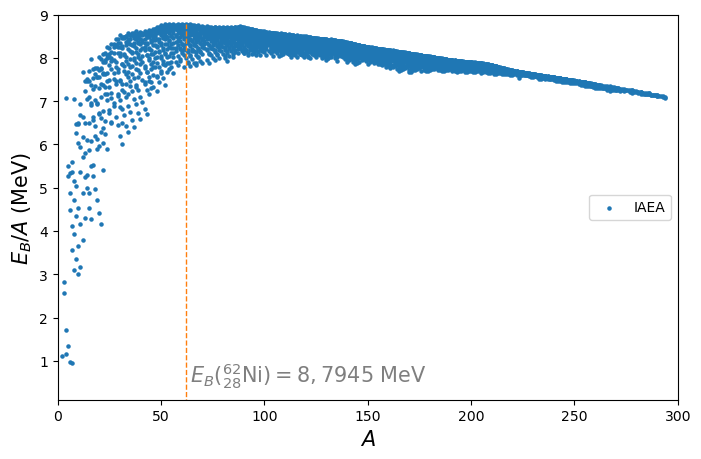

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import pandas as pd

jpac_blue   = "#1F77B4"; jpac_red    = "#D61D28";
jpac_green  = "#2CA02C"; jpac_orange = "#FF7F0E";
jpac_purple = "#9467BD"; jpac_brown  = "#8C564B";
jpac_pink   = "#E377C2"; jpac_gold   = "#BCBD22";
jpac_aqua   = "#17BECF"; jpac_grey   = "#7F7F7F";

jpac_color = [jpac_blue, jpac_red, jpac_green, 
              jpac_orange, jpac_purple, jpac_brown,
              jpac_pink, jpac_gold, jpac_aqua, jpac_grey, 'black' ];

jpac_axes = jpac_color[10]
dashes = 60*'-'

# the service URL
livechart = "https://nds.iaea.org/relnsd/v1/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['binding'],errors='coerce').notna()]
df['binding'] /= 1000
df['A'] = df['n']+df['z']


fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((0.1,9.))
plt.xlim((0.,300.))
plt.vlines(62,0.,df['binding'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(df['A'], df['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.text(64,0.5,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True)
plt.show()  


## Fórmula Semiempírica de masas ##


$$ E_B / A = a_V - a_S / A^{1/3} - a_C * Z^2 / A^{4/3} - a_A * (A-2\, Z)^2/A^2 + \delta /A^{3/2}$$

donde 

$$    a_V, a_S, a_C, a_A = 15.75, 17.8, 0.711, 23.7 $$

y $\delta$

$$\begin{matrix} par-par \quad 11,18 \\ par-impar \quad 0 \\ impar-impar \quad -11,18 \end{matrix}$$


Parametrización de J. W. Rohlf, Modern Physics from α to Z0, Wiley (1994).

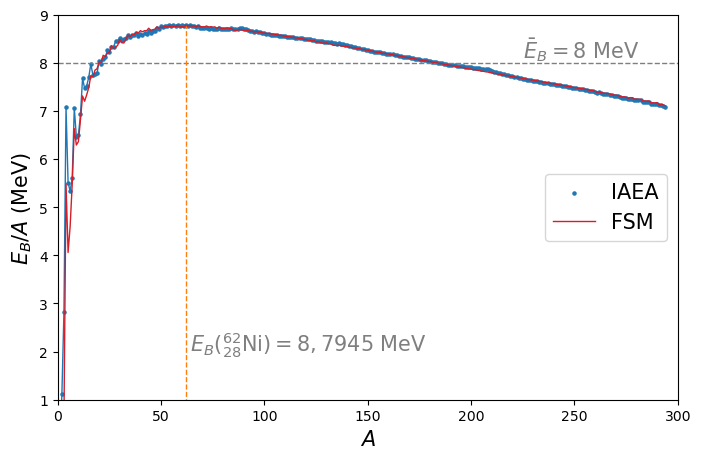

In [2]:
def FSM(Z,N):
    aV, aS, aC, aA, delta = 15.75, 17.8, 0.711, 23.7, 11.18
    Z, N = np.atleast_1d(Z), np.atleast_1d(N)
    A = Z + N
    sgn = np.zeros(Z.shape)
    sgn[(Z%2==0) & (N%2==0)] =  1.
    sgn[(Z%2!=0) & (N%2!=0)] = -1.
    return aV - aS / A**(1./3.) - aC * Z**2. / A**(4./3.) - aA * (A-2.*Z)**2./A**2. + sgn * delta/A**(3./2.)

gdf = df.groupby('A')
maxavEbind = gdf.apply(lambda t: t[t.binding==t.binding.max()])
maxavEbind['Eb'] = FSM(maxavEbind['z'], maxavEbind['n'])

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((1.,9.))
plt.xlim((0.,300.))
plt.hlines(8,0.,300.,colors=jpac_color[9], lw=1., linestyles='dashed')
plt.vlines(62,0.,maxavEbind['Eb'].max(),colors=jpac_color[3], lw=1., linestyles='dashed')
plt.scatter(maxavEbind['A'], maxavEbind['binding'],marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.plot(maxavEbind['A'], maxavEbind['binding'],'-',lw=1,c=jpac_color[0])
plt.plot(maxavEbind['A'], maxavEbind['Eb'],'-',lw=1,c=jpac_color[1],label='FSM')
plt.text(225,8.1,r'$\bar{E}_B=8$ MeV',c=jpac_color[9],fontsize=15)
plt.text(64,2,r'$E_B(^{62}_{28}$Ni$)=8,7945$ MeV',c=jpac_color[9],fontsize=15)
plt.legend(loc='center right',ncol=1,frameon=True,prop={'size': 15})
plt.show() 
#fig.savefig('FSM.pdf', bbox_inches='tight')   

### Diferencia entre la FSM y los datos experimentales ###

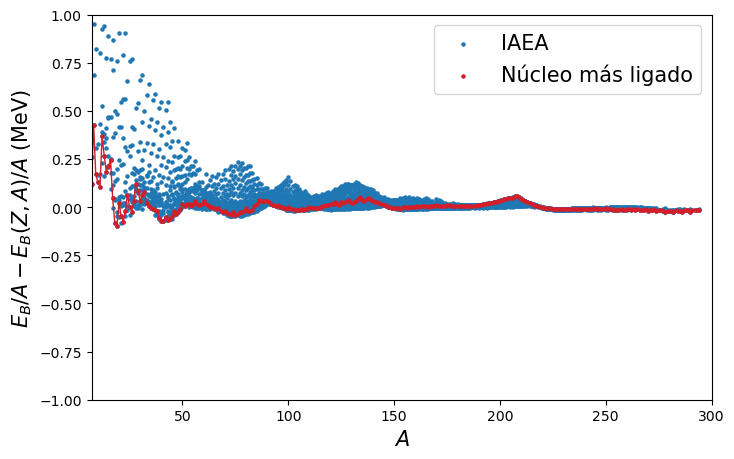

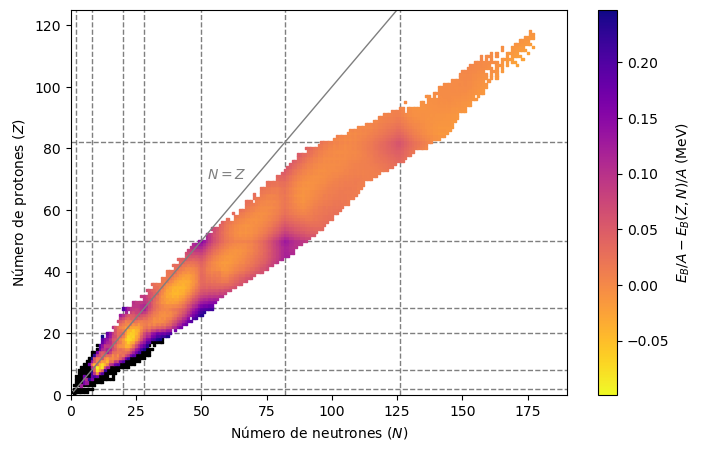

In [38]:
df['diff'] = df['binding'] - FSM(df['z'],df['n'])
df1 = df.loc[ ( (df['diff'] < .25) &  (df['diff'] > -0.1) ) ]
df2 = df.loc[ ( df['diff'] <= -.1 ) ]
df3 = df.loc[ ( df['diff'] >=  .25 ) ]

fig = plt.figure(figsize=(8,5))
plt.ylabel(r'$E_B/A-E_B(Z,A)/A$ (MeV)',fontsize=15)
plt.xlabel(r'$A$',fontsize=15)
plt.ylim((-1.,1.))
plt.xlim((7.,300.))
plt.scatter(df['A'], df['binding']-FSM(df['z'],df['n']),marker='o',s=5,c=jpac_color[0],label='IAEA')
plt.scatter(maxavEbind['A'], maxavEbind['binding']-maxavEbind['Eb'],marker='o',s=5,c=jpac_color[1],label='Núcleo más ligado')
plt.plot(maxavEbind['A'], maxavEbind['binding']-maxavEbind['Eb'],'-',lw=1,c=jpac_color[1])
plt.legend(loc='upper right',ncol=1,frameon=True,prop={'size': 15})
plt.show()
#fig.savefig('diffFSM.pdf', bbox_inches='tight') 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5)) 
ax.set_xlabel(r'Número de neutrones ($N$)')
ax.set_ylabel(r'Número de protones ($Z$)')
ax.set_xlim((0,190))
ax.set_ylim((0,125))
x = np.linspace(1,125,125)
ax.hlines( [2,8,20,28,50,82,126], 0, 190,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
ax.vlines( [2,8,20,28,50,82,126], 0, 125,colors=jpac_color[9], lw=1., linestyles='dashed',zorder=0)
ax.plot(x,x,'-',lw=1,color=jpac_color[9])
#ax.text(60,25,r'Experimento$-$FSM',c=jpac_color[10],fontsize=10)
ax.text(52,70,r'$N=Z$',c=jpac_color[9],fontsize=10)
ax.scatter(df2['n'],df2['z'],marker='s',s=2.5, c=jpac_color[7])
ax.scatter(df3['n'],df3['z'],marker='s',s=2.5, c=jpac_color[10])
pa = ax.scatter(df1['n'],df1['z'],marker='s',s=2.5, c=df1['diff'], cmap='plasma_r')
fig.colorbar(pa,ax=ax,orientation='vertical',label=r'$E_B/A-E_B(Z,N)/A$ (MeV)')
plt.show() 
fig.savefig('CartaNuclearEBIAEA.pdf', bbox_inches='tight')   